In [1]:
import os,glob
import pandas as pd
import nltk
import numpy as np
from langdetect import detect
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


#### Load manuscripts without filtering

In [2]:
original_files = {}
for i in glob.glob('data/raw/*txt'):
    doc = open(i).read().splitlines()
    original_files[i[-5]] = doc

In [3]:
original_files["I"][:2]

['1.2 || Ac on æ drihtnes his willa & on his æ he smeaþ ł foreþenceþ dæges & nihtes || Sed in lege domini uoluntas eius et in lege eius meditabitur die ac nocte.',
 '1.3 || & he bið swaswa treow þe geplantod is ł þæt ðe geset is wið rynas wætera þæt þe westm his selð ł forgifð on his tide & leaf his ne tofleuwð & ealle þingc swa hwæt swa he deð beoð gespedde ł beoð gesundfullode || Et erit tamquam lignum quod plantatum est secus decursus aquarum quod fructum suum dabit in tempore suo Et folium eius non defluet et omnia quęcumque faciet prosperabuntur.']

### Does old english have punctuation for sentence separation?

### Check max length of split by || separator

In [4]:
min_val = 10
max_val = 0
for k,v in original_files.items():
    for sentence in v:
        splitted_sentence_length = len(sentence.split("||"))
        if splitted_sentence_length==2:
            print(sentence)
        if splitted_sentence_length>max_val:
            max_val = splitted_sentence_length
        if splitted_sentence_length<min_val:
            min_val = splitted_sentence_length

print("min value",min_val,"max_value",max_val)

17.50 || Forðon ic andette þe on folcum drihten & naman þinum sealm ic.
118.164 || Seofon siðum on dæge lof ic cwæð to ðe ofer domas þinre ryhtwisnesse.
min value 2 max_value 5


### Store the data in 5 lists in the format: key in the first column, detected language in the others

In [5]:
first_col = []
second_col = []
third_col = []
fourth_col = []
fifth_col = []

In [6]:
#Long running time! Don't run again
#Separate all the sentences in five columns.
#Returns Language detected for each sentence in the verse
for k,v in original_files.items():
    #Loop through all the verses in a manuscript
    for sentence in v:
        splitted_sentence = sentence.split("||")
        splitted_sentence_stripped = [x.strip() for x in splitted_sentence]
        lengths_splitted_segments = [len(x) for x in splitted_sentence_stripped]
        if min(lengths_splitted_segments)<2:
            continue

        for index, segment in enumerate(splitted_sentence):
            if index==0:
                first_col.append(segment)
            elif index==1:
                second_col.append(detect(segment))
            elif index==2:
                third_col.append(detect(segment))
            elif index==3:
                fourth_col.append(detect(segment))
            else:
                fifth_col.append(detect(segment))

## Compare with this
https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes

In [8]:
from language_codes import languages
iso639_dict = dict(languages)

def map_language(dict):

    """Returns a dictionary

    Modern Language identification 
    """
    mapped_list = []
    for k,v in dict.items():
        mapped_list.append(iso639_dict[k])

    return mapped_list

second_col_lang_name = [iso639_dict[k] for k in second_col]
third_col_lang_name = [iso639_dict[k] for k in third_col]
fourth_col_lang_name = [iso639_dict[k] for k in fourth_col]
fifth_col_lang_name = [iso639_dict[k] for k in fifth_col]

In [10]:

def create_horz_hist (value_list,threshold,title):
    df_langs = pd.DataFrame({"col":value_list,"count":1})
    df_langs["group_count"] = df_langs.groupby(['col'])['col'].transform('count')
    df_langs["language"] = df_langs.apply(lambda row: row["col"] if row["group_count"]>threshold else "Other",axis=1 )
    df_langs.sort_values(by=["group_count"],ascending=False,inplace=True)
    ax = sns.histplot(data = df_langs, 
    y="language").set(title=title)
    return ax

[Text(0.5, 1.0, 'Languages first column')]

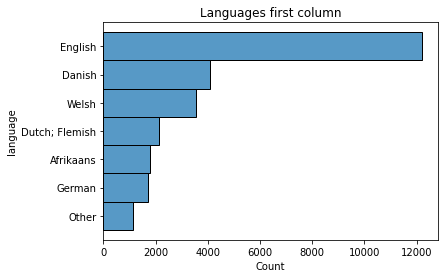

In [15]:
ax2 = create_horz_hist(second_col_lang_name,220,"Languages first column")
ax2

[Text(0.5, 1.0, 'Languages second column')]

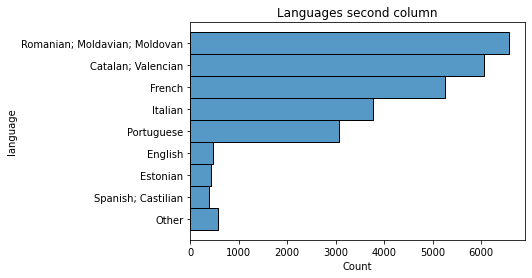

In [12]:
ax3 = create_horz_hist(third_col_lang_name,150,"Languages second column")
ax3

[Text(0.5, 1.0, 'Languages third column')]

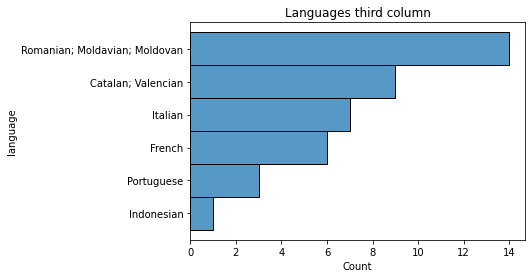

In [13]:
ax4 = create_horz_hist(fourth_col_lang_name,0,"Languages third column")
ax4

[Text(0.5, 1.0, 'Languages fourth column')]

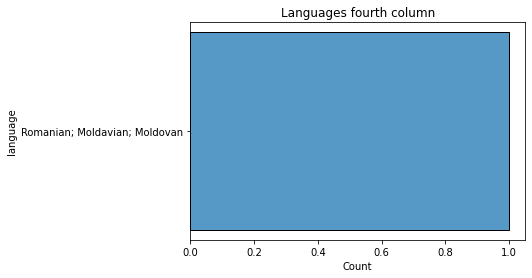

In [14]:
ax5 = create_horz_hist(fifth_col_lang_name,0,"Languages fourth column")
ax5